# 1. Знакомство с `torch.Tensor`

__Авторы__: 
* Сергей Вячеславович Макрушин (SVMakrushin@fa.ru) 
* Никита Владимирович Блохин (NVBlokhin@fa.ru)

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [1]:
import torch

## 1. Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [3]:
t = torch.zeros(8, 8)
t[0] = torch.tensor([-4., -3., -2., -6., -5., -2., -3., -4.])
t[-1] = t[0] * -1
t[1] = -1 * torch.ones(1, 8)
t[-2] = t[1] * -1
t

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [4]:
result = 1
for i in range(2, 21, 2):
    result *= torch.tensor(i * (i + 1))

print(result)

tensor(-4249290049419214848)


In [27]:
A = torch.arange(2, 22)
print(A[::2] * A[1::2])

print(A.prod())

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])
tensor(-4249290049419214848)


1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [42]:
torch.arange(1, 111).reshape(-1, 10)[::, :7:]

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

In [41]:
torch.arange(1, 111).view(-1, 10)[:, :7]

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [66]:
t = torch.rand(4, 7) * 20

m = t.min()
M = t.max()

a = 1 / (M - m)
b = - a * m


print(a * t + b)

tensor([[0.2127, 0.6927, 0.0895, 0.0428, 1.0000, 0.8306, 0.7054],
        [0.1209, 0.3315, 0.5235, 0.0943, 0.7133, 0.6673, 0.8955],
        [0.7131, 0.6961, 0.5092, 0.4611, 0.5143, 0.6764, 0.0000],
        [0.8694, 0.3530, 0.9724, 0.1622, 0.3219, 0.8830, 0.7245]])


In [67]:
t = torch.distributions.Uniform(0, 20).sample((4, 7))
(t - t.min()) / (t.max() - t.min())

tensor([[0.4459, 0.0620, 0.0000, 0.9341, 0.3709, 0.4306, 0.7665],
        [0.9936, 0.8478, 0.9112, 0.9723, 0.2828, 0.9908, 0.1809],
        [0.9409, 0.8781, 0.9884, 1.0000, 0.2060, 0.3483, 0.5826],
        [0.0584, 0.1079, 0.9668, 0.2355, 0.7321, 0.1669, 0.8816]])

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в тензорах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

## 2. Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [107]:
base = torch.arange(1, 8)
tensor = base + 10 * torch.arange(0, 11).view(-1, 1)
print(tensor)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])


In [103]:
print(torch.arange(0, 11).view(-1, 1))

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]])


Обратите внимание, что метод view(-1, 1) используется для преобразования одномерного тензора torch.arange(0, 11) в двумерный тензор формы (11, 1). Это позволяет нам использовать широковещательную передачу, чтобы добавить ее к базовому тензору, имеющему форму (7,).

Это добавит 10 к каждому элементу в каждой строке тензора, эффективно создавая желаемый шаблон.

## 3. Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
tensor([1, 3, 5, 7])
```

In [111]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])

torch.nonzero(a == b).flatten()

tensor([1, 3, 5, 7])

3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
```

Ожидается результат:

```python
tensor([6, 9, 10])
```

In [113]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])

a[(a >= 5) & (a <= 10)]

tensor([ 6,  9, 10])

3.4 Поменять местами столбец 1 и 2 тензора `torch.arange(9).reshape(3, 3)`

In [136]:
# torch.arange(9).reshape(3, 3)
a = torch.arange(9).reshape(3, 3)
print(a)

a[:, [0, 1]] = a[:, [0, 2]]

print(a)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 2, 2],
        [3, 5, 5],
        [6, 8, 8]])


In [120]:
a[:, [0, 2, 1]]


tensor([[1, 2, 0],
        [4, 5, 3],
        [7, 8, 6]])

3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в нем строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [137]:
A = torch.randint(0, 10, (8, 10))
A

tensor([[5, 1, 4, 8, 7, 0, 3, 5, 4, 0],
        [8, 5, 3, 4, 1, 9, 2, 2, 5, 9],
        [7, 4, 1, 3, 6, 9, 3, 8, 6, 5],
        [8, 4, 2, 6, 0, 2, 1, 5, 4, 1],
        [7, 3, 2, 1, 6, 8, 9, 7, 0, 1],
        [0, 4, 7, 0, 9, 2, 3, 4, 1, 5],
        [9, 5, 9, 6, 5, 4, 0, 8, 1, 1],
        [5, 3, 4, 0, 4, 1, 1, 3, 8, 5]])

In [138]:
sums = A.sum(dim=1)
sums

tensor([37, 48, 52, 33, 44, 35, 48, 34])

In [141]:
idx = torch.argmin(sums)

idx.item()

3

3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [144]:
# Create a tensor from 20 random integers from 0 to 100
tensor = torch.randint(0, 101, (20,))

# Trim values from below by value 30 and from above by value 70
tensor = torch.clamp(tensor, 30, 70)

print("Tensor with trimmed values:", tensor)

Tensor with trimmed values: tensor([70, 53, 30, 30, 41, 30, 30, 30, 30, 70, 42, 47, 30, 30, 70, 46, 30, 70,
        51, 39])


3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

## 4. Математические задачи

4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции ``x * sin(x)`` больше 0.5.

4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

# Лабораторная (домашняя) работа 1.1

1.4 (**Lab1**) Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [51]:
def first_one(n, m):
    

    mask = torch.tensor([[0, 1], [2, 3]])
    return mask.repeat(n, m)[:n, :m]

    

n, m = 4, 5

first_one(4, 5)

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]])

1.7 (**Lab1.1**) Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [76]:
t = torch.randint(0, 101, (20, ))

print(t)
print(t[1])
print(t.nonzero()[1].item())

tensor([35, 48, 33, 19, 41, 20, 60, 30, 11, 54, 56, 49, 77, 71,  0, 54, 27, 56,
         8, 96])
tensor(48)
1


2.2 (**Lab1**) Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [77]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])

result = a_2d - b_1d.view(-1, 1)
print(result)

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])


3.2 (**Lab1**) Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3, 3)`.

Ожидаемый результат:


```python
tensor([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [84]:
t = torch.arange(9).view(3, 3)

t.flip(dims=(-2, 1))

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

3.7 (**Lab1**) Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [86]:
tensor1 = torch.randint(0, 11, (30, 3))
tensor2 = torch.randint(0, 11, (30, 3))

result = tensor1[tensor1 > tensor2]
print(result)
sum_result = result.sum()
print("Sum of values in tensor1 greater than corresponding values in tensor2: ", sum_result)

tensor([ 2,  4,  6, 10, 10,  8,  9,  9,  4,  5,  4,  4,  6,  7, 10,  2,  3,  8,
         7,  7,  8, 10,  8,  7,  5,  7,  4,  5,  7, 10,  8, 10,  9,  7, 10, 10,
         7,  5,  3, 10,  4])
Sum of values in tensor1 greater than corresponding values in tensor2:  tensor(279)


3.8 (**Lab1**) При помощи прихотливого индексирования для двухмерного тензора размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить тензор элементов находящихся на диагонали, проходящей над основной диагональю.

In [87]:
a = torch.randint(0, 11, (20, 20))

# Get the indices of elements above the main diagonal
idx = torch.triu_indices(20, 20, 1)

# Use the indices to extract the elements above the main diagonal
result = a[idx[0], idx[1]]

print(result)

tensor([ 4,  5,  5,  1,  9,  1,  9,  0,  6,  4,  6,  0,  8,  1,  6,  0,  6,  3,
         7,  1,  0,  2,  6,  5,  9, 10,  8, 10,  1, 10,  4,  8,  9,  5,  2, 10,
         4,  8,  2,  1,  7,  0,  4,  5,  7,  9,  3,  5,  6,  8,  0,  4,  9,  6,
         3,  9,  7, 10,  8,  8,  1,  9,  7,  7,  4,  2,  1,  7,  3,  7,  2,  5,
         6,  2,  3,  3,  6,  4,  4,  4, 10,  0,  7,  3,  6,  2,  8,  1, 10,  9,
         4,  3,  2,  2,  4,  7,  7,  9,  9,  1,  3,  8,  9,  7,  0,  3,  0,  7,
         8,  6,  6,  5,  3,  6,  8,  3,  0,  5,  5,  4,  2,  3,  3,  5,  5,  1,
         1,  9,  8,  6,  1,  2, 10,  3,  7,  7,  4,  7,  2,  2,  4,  8,  0,  9,
         4,  6, 10,  8,  9,  2,  4,  5,  2,  7,  9,  2,  9,  4,  3,  8,  9,  9,
         3,  7,  2,  1, 10,  6,  2,  0,  8,  0, 10,  0,  5,  1,  8,  6,  3,  0,
         0,  5, 10,  1,  4,  4,  6,  5,  3,  5])


3.9 (**Lab1**) Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [95]:
ar1 = torch.randint(0, 11, (5, 10))
ar2 = torch.randint(0, 11, (5, 10))


same_indices = (ar1 == ar2)

ar1[same_indices] *= 2

ar1

tensor([[16,  4,  5,  8,  7,  1,  8,  1,  4,  6],
        [ 9,  1,  9, 10, 10,  2,  1,  4, 10, 10],
        [10,  6,  4,  0,  0,  0,  0,  2,  2,  1],
        [10,  6,  2,  6,  2,  5,  9, 14,  6,  8],
        [18,  8,  5,  8,  9,  6,  4,  0,  8,  4]])

3.12 (**Lab1**) Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [108]:
ar1 = torch.rand(4, 7)
print(ar1)

max_index = torch.argmax(ar1)
max_row, max_col = max_index // 7, max_index % 7
print(max_index, max_row, max_col)

# ar1[max_row+1:, max_col] = 0
# ar1[max_row:, max_col+1:] = 0 
ar1[max_row+1:, :] = 0
ar1[:, max_col+1:] = 0


print(ar1)

tensor([[0.3182, 0.8894, 0.0584, 0.5469, 0.3913, 0.6665, 0.6341],
        [0.5763, 0.7242, 0.3565, 0.8093, 0.6279, 0.7240, 0.0859],
        [0.6749, 0.8712, 0.8928, 0.6372, 0.0439, 0.7105, 0.6800],
        [0.7320, 0.2271, 0.8191, 0.9990, 0.8138, 0.1561, 0.7042]])
tensor(24) tensor(3) tensor(3)
tensor([[0.3182, 0.8894, 0.0584, 0.5469, 0.0000, 0.0000, 0.0000],
        [0.5763, 0.7242, 0.3565, 0.8093, 0.0000, 0.0000, 0.0000],
        [0.6749, 0.8712, 0.8928, 0.6372, 0.0000, 0.0000, 0.0000],
        [0.7320, 0.2271, 0.8191, 0.9990, 0.0000, 0.0000, 0.0000]])


3.14 (**Lab1**) Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

4.2 (**Lab1**) Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

4.4 (**Lab1**) Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

4.6 (**Lab1**) Задан произвольный тензор torch (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число, наиболее близкое к заданному.

In [142]:
import numpy as np

# Generate a random numpy array of 100 values between 0 and 1
arr = np.random.rand(100)

# Define the value to find the closest to
given_value = 1.75

# Find the index of the value in the array that is closest to the given value
closest_index = np.abs(arr - given_value).argmin()

# Get the actual value in the array that is closest to the given value
closest_value = arr[closest_index]

print("Array:", arr)
print("Given value:", given_value)
print("Closest value:", closest_value)

Array: [0.44072337 0.83940853 0.73608543 0.8787729  0.1469122  0.41805181
 0.65560897 0.75512683 0.73718213 0.81974391 0.95779879 0.37502446
 0.5803224  0.38002418 0.22294897 0.50085329 0.60113502 0.64690339
 0.28606541 0.35833573 0.49964218 0.21028855 0.89821767 0.12028529
 0.99979751 0.83180425 0.45145481 0.12682793 0.69218752 0.90440547
 0.31797024 0.92341817 0.94232666 0.92275409 0.83612251 0.18528448
 0.94938793 0.30500898 0.14073969 0.88164336 0.98144398 0.10827737
 0.13030744 0.19223824 0.39073911 0.37703617 0.2539159  0.14117178
 0.7719642  0.25497302 0.90239129 0.68016684 0.33628401 0.15804014
 0.65569421 0.79830641 0.10692774 0.18637637 0.27289126 0.0911948
 0.62711715 0.17489366 0.17722947 0.54558863 0.57975955 0.41406442
 0.7981727  0.74939845 0.0726738  0.39107849 0.46048491 0.7551012
 0.0617582  0.62411184 0.34908695 0.04517919 0.04305142 0.97862993
 0.7238886  0.58627329 0.23593494 0.11149297 0.31362953 0.53661939
 0.41765401 0.5845984  0.89176361 0.1218555  0.81447313 0

4.9 (**Lab1**) Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

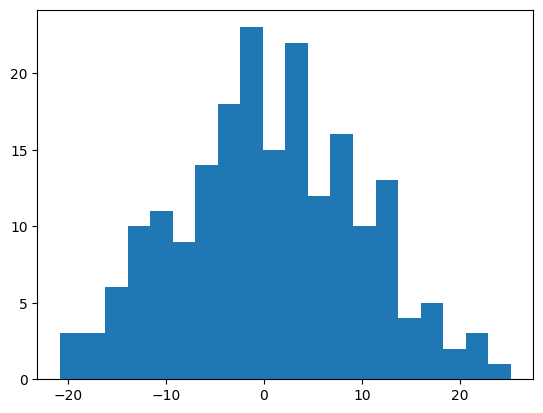

In [143]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем тензор из 200 случайных чисел, нормально распределенных с заданными параметрами
tensor = np.random.normal(loc=0, scale=10, size=(200,))

# Строим гистограмму с 20 бинами
plt.hist(tensor, bins=20)

# Отображаем гистограмму
plt.show()